In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image


## Data Preparation

In [2]:
import kagglehub

# Download latest version
test_path = kagglehub.dataset_download("naykrit/animal-classification")
train_path = path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to test files:", test_path)
print("Path to train files:", train_path)

Path to test files: /kaggle/input/animal-classification
Path to train files: /kaggle/input/animal-image-dataset-90-different-animals


In [3]:
def load_images_from_directory(directory, sel, image_size=(150, 150)):
    images = []
    labels = []
    class_names = os.listdir(directory)
    
    for class_name in sel:
        class_path = os.path.join(directory, class_name)
        
        if os.path.isdir(class_path):
            # Get all image files in the directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = image.load_img(img_path, target_size=image_size)
                    img_array = image.img_to_array(img) / 255.0  # Normalize the image
                    images.append(img_array)
                    labels.append(sel.index(class_name))  # Index of class_name as label
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [4]:
train_dir = train_path + '/animals/animals'  
test_dir = test_path + '/test_set'
class_names = ["dog", "cat", "elephant", "lion", "tiger"]
num_classes = len(class_names)

# Load the training and testing data
print("Loading training data...")
train_images, train_labels = load_images_from_directory(train_dir, sel = class_names)
print("Loading test data...")
test_images, test_labels = load_images_from_directory(test_dir, sel = class_names)
train_images, e_images, train_labels, e_labels = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.2, random_state=42)

Loading training data...
Loading test data...


In [5]:
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"Class {class_name}: {num_images} images")

Class dog: 60 images
Class cat: 60 images
Class elephant: 60 images
Class lion: 60 images
Class tiger: 60 images


In [6]:
def show_example_images(images, labels, class_names, target_class, num_images=5):
    class_index = class_names.index(target_class)  # Get the index for the target class
    class_images = [images[i] for i in range(len(images)) if labels[i] == class_index]
    
    # Randomly select a number of images from the filtered class
    selected_images = random.sample(class_images, min(num_images, len(class_images)))
    
    # Plot the selected images
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(selected_images):
        plt.subplot(1, num_images, i+1)
        
        # Reverse normalization
        img = img * 255.0  # Reverse normalization to show the actual image
        img = img.astype(np.uint8)
        
        # Plot each image
        plt.imshow(img)
        plt.title(f"Label: {target_class}")
        plt.axis('off')  
    
    plt.show()

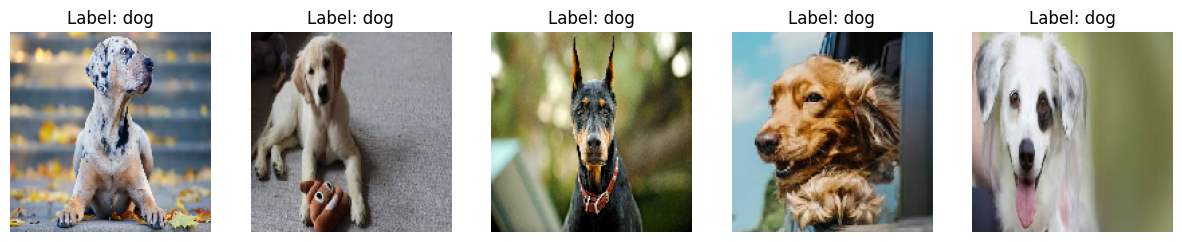

In [7]:
show_example_images(train_images, train_labels, class_names, target_class="dog", num_images=5)

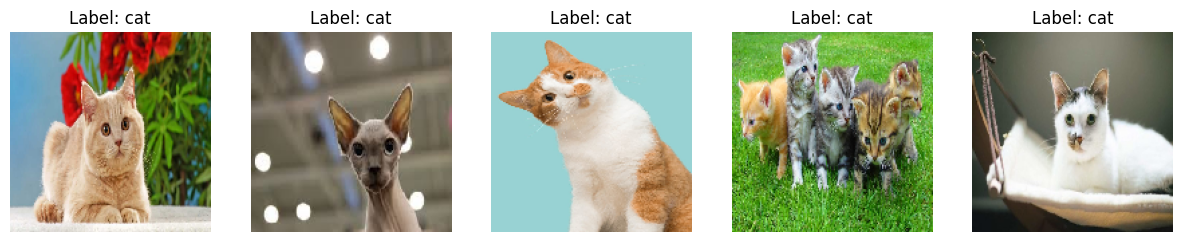

In [8]:
show_example_images(train_images, train_labels, class_names, target_class="cat", num_images=5)

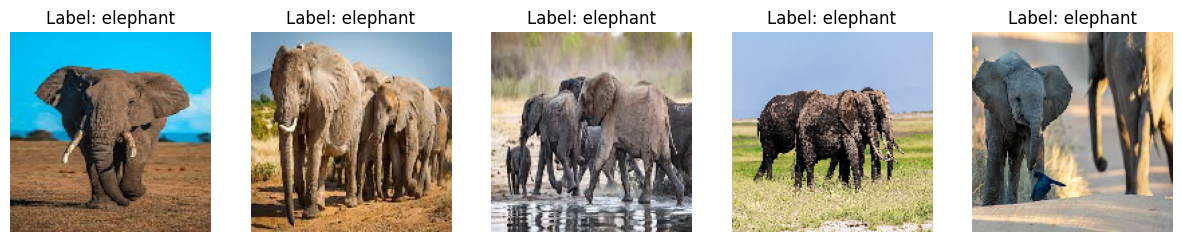

In [9]:
show_example_images(train_images, train_labels, class_names, target_class="elephant", num_images=5)

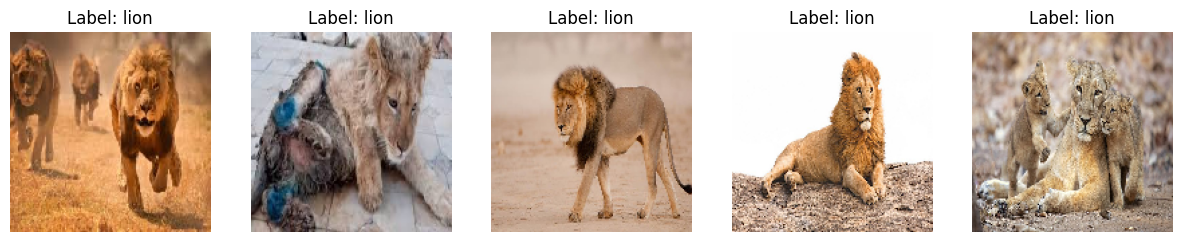

In [10]:
show_example_images(train_images, train_labels, class_names, target_class="lion", num_images=5)

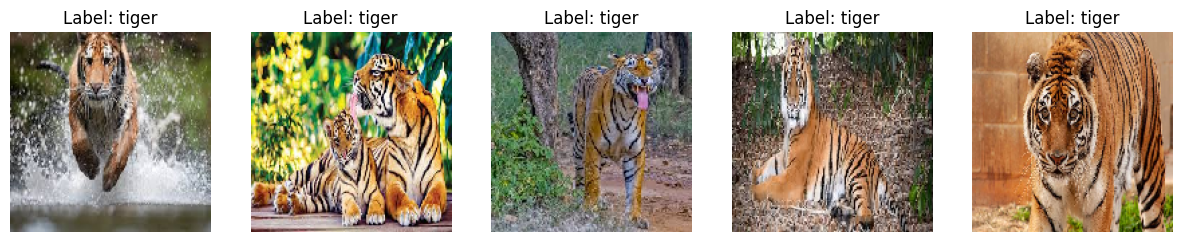

In [11]:
show_example_images(train_images, train_labels, class_names, target_class="tiger", num_images=5)